<a href="https://colab.research.google.com/github/tomcat472/geopandas_mm/blob/main/geopandas_july_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from shapely.geometry import Point

In [4]:
# plotting csv/xls file
df=pd.read_csv('/content/drive/MyDrive/Shape File/lahe_village.csv')
df.head()

,SR_Pcode,District/SAZ_Pcode,District/SAZ_Name_Eng,Tsp_Pcode,Township_Name_Eng,VT_Pcode,Village_Tract_Name_Eng,Village_Pcode,Village_Name_Eng,Village_Name_MMR,Commonly_Used_Local_Vlg_Name_Eng,Commonly_Used_Local_Vlg_Name_Mya,Longitude,Latitude,Source,Start_Date,Modified_End_Date,Notification,Notification_modified,Village_Status
0,MMR005,MMR005S001,Naga Self-Administered Zone,MMR005036,Lahe,MMR005036008,Ant Paw,176804,Ant Paw,????????,NaN,NaN,95.385643,26.411461,GAD,31-Mar-15,NaN,No. 000/2015,NaN,Active
1,MMR005,MMR005S001,Naga Self-Administered Zone,MMR005036,Lahe,MMR005036029,Htan Khaw,176855,Htan Khaw,???????,NaN,NaN,95.618843,26.206579,GAD,31-Mar-15,NaN,No. 000/2015,NaN,Active
2,MMR005,MMR005S001,Naga Self-Administered Zone,MMR005036,Lahe,MMR005036005,Htan Khaw Nauk Kone,176797,Htan Khaw Hay Mon,?????????????,NaN,NaN,95.440910,26.570601,GAD,31-Mar-15,NaN,No. 000/2015,NaN,Active
3,MMR005,MMR005S001,Naga Self-Administered Zone,MMR005036,Lahe,MMR005036005,Htan Khaw Nauk Kone,176793,Htan Khaw Nauk Kone,?????????????????,NaN,NaN,95.368881,26.587099,GAD,31-Mar-15,NaN,No. 000/2015,NaN,Active
4,MMR005,MMR005S001,Naga Self-Administered Zone,MMR005036,Lahe,MMR005036026,Hton San,176850,Hton San,?????,NaN,NaN,95.294128,26.189159,GAD,31-Mar-15,NaN,No. 000/2015,NaN,Active


In [5]:
# function တခုဆောက်ပြီး shapely နဲ့ တွဲသုံးမှာ ဖြစ်ပါတယ်။
points=df.apply(lambda row: Point(row.Longitude,row.Latitude),axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


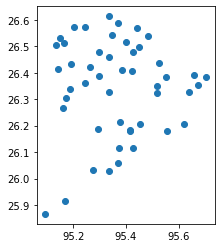

In [6]:
# အပေါ်က ဆောက်ထားတဲ့ points တွေကို geopandas ရဲ့ dataframe ထဲကို ထည့်ရပါမယ်။
villages=gpd.GeoDataFrame(df,geometry=points)
villages.plot()

In [7]:
# crs ကို စစ်ကြည့်လိုက်တော့ none ဖြစ်နေတာကို တွေ့ရမှာဖြစ်ပါတယ်
# အဲ့တာမို့ crs ကို သတ်မှတ်ပေးဖို့လိုပါတယ်။
print(villages.crs)

None


In [8]:
# crs သတ်မှတ်ခြင်း
villages.crs={'init':'epsg:4326'}

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [9]:
# ဒါဆိုရင် crs တန်ဖိုးရှိသွားပြီဖြစ်ကြောင်း တွေ့ရမှာဖြစ်ပါတယ်။
print(villages.crs)

+init=epsg:4326 +type=crs


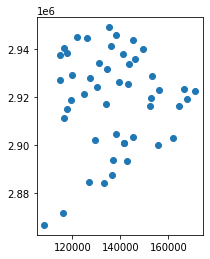

In [10]:
# crs သတ်မှတ်ထားတဲ့ layer ကို ပြန်ပြီး reproject လုပ်လို့ရပါတယ်။
villages.to_crs(epsg=32647).plot()

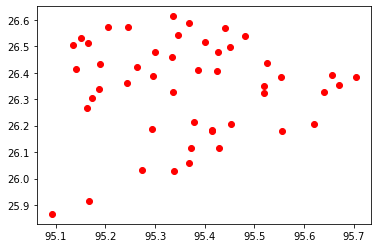

In [11]:
# geopandas နည်းကို မသုံးပဲ data visuialization က plotting method ကိုသုံးပြီး layer ကို ကြည့်လို့ရပါတယ်။
# အဲ့လိုဟာတွေက geometry မပါပါဘူး။ spatial analysis လုပ်လို့ အဆင်မပြေပါဘူး။
# ဒီနည်းက လုံးဝမသုံးသင့်ပါဘူး။

plt.scatter(df.Longitude,df.Latitude,marker='o',color='red');

In [12]:
# (1-7-2022)